In [1]:
# Import used libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#Import csv
stock = pd.read_csv('stock_data.csv')
print(stock.head())

   Unnamed: 0        Date         Open        Close  Volume  Change
0           0  2019-11-10  2969.520472  2999.742644  967803    1.02
1           1  2019-11-17  2731.232389  2727.037939  895803   -0.15
2           2  2019-11-24  2603.829133  2602.605173  883489   -0.05
3           3  2019-12-01  2889.558251  2764.358493  784014   -4.33
4           4  2019-12-08  2485.534418  2440.562975  901310   -1.81


In [3]:
stock = stock[['Date', 'Open', 'Close', 'Volume', 'Change']]
print(stock.head())

         Date         Open        Close  Volume  Change
0  2019-11-10  2969.520472  2999.742644  967803    1.02
1  2019-11-17  2731.232389  2727.037939  895803   -0.15
2  2019-11-24  2603.829133  2602.605173  883489   -0.05
3  2019-12-01  2889.558251  2764.358493  784014   -4.33
4  2019-12-08  2485.534418  2440.562975  901310   -1.81


In [4]:
# tradition step
# logistic regression
# higher dimension
# CNN

In [5]:
# Regression using the Normal Equation (X.T*X)*theta = (X.T*y)
# Shift the change vector by 1 to make features project into next week
stock['Next Change'] = stock['Change'].shift(-1)
# Drop any rows with NaN values (will occur on last row due to shifting)
stock = stock.dropna()
# Define feature matrix X and target vector y
X = stock[['Open', 'Close', 'Volume']].values
y = stock['Next Change'].values
X = np.c_[np.ones((X.shape[0], 1)), X]
theta_linear = np.linalg.inv(X.T @ X) @ X.T @ y
print(theta_linear)

[-1.55070027e+00  1.12244075e-03 -1.37045317e-03  8.66765529e-07]


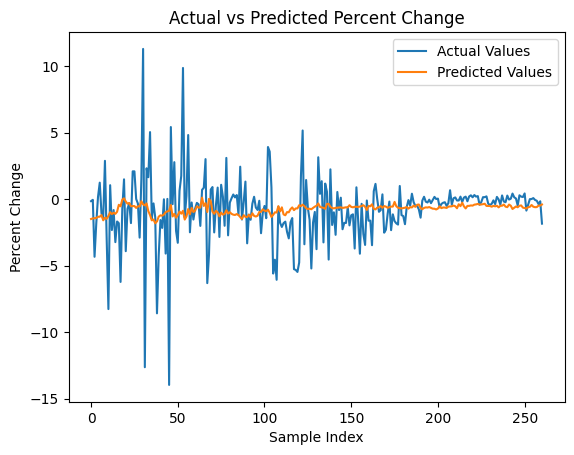

In [6]:
# Predictions on the training set
y_pred = X @ theta_linear

# Plot predictions
plt.plot(range(len(y)), y, label="Actual Values")
plt.plot(range(len(y_pred)), y_pred, label="Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Percent Change")
plt.title("Actual vs Predicted Percent Change")
plt.legend()
plt.show()

In [7]:
# Get Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6.00701249829784


In [8]:
# Create quadratic features
X_quad = np.hstack([X, X**2])
X_quad = np.c_[np.ones((X_quad.shape[0], 1)), X_quad]
theta_quad = np.linalg.pinv(X_quad.T @ X_quad) @ X_quad.T @ y
print(theta_quad)

[-1.48534837e-12 -1.48461434e-12 -7.86886272e-10 -7.98834924e-10
 -1.22357426e-06 -1.48534837e-12  3.47957616e-08 -8.75008284e-08
  6.07116446e-13]


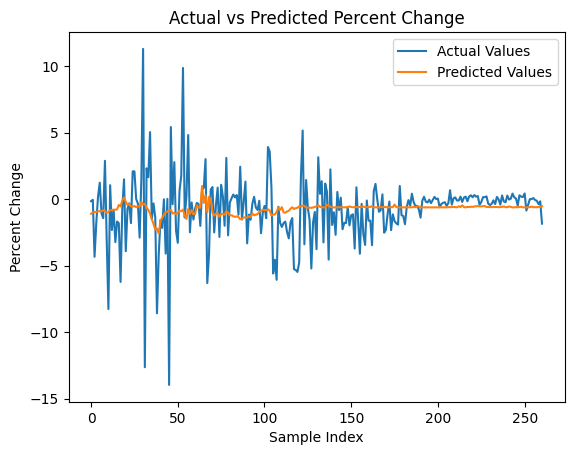

In [9]:
# Predictions on the training set
y_pred = X_quad @ theta_quad

# Plot predictions
plt.plot(range(len(y)), y, label="Actual Values")
plt.plot(range(len(y_pred)), y_pred, label="Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Percent Change")
plt.title("Actual vs Predicted Percent Change")
plt.legend()
plt.show()

In [10]:
# Get Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6.001653371582961


In [11]:
# Add a small regularization term to the diagonal
lambda_identity = 1e-5 * np.eye(X_quad.shape[1])  # Adjust lambda as needed
theta_quad = np.linalg.inv(X_quad.T @ X_quad + lambda_identity) @ X_quad.T @ y
print(theta_quad)

[-2.88036240e-01 -2.88051043e-01  8.33528601e-03 -8.57492390e-03
 -3.04773481e-08 -2.88043664e-01 -8.61579414e-07  8.67096548e-07
  2.41469071e-13]


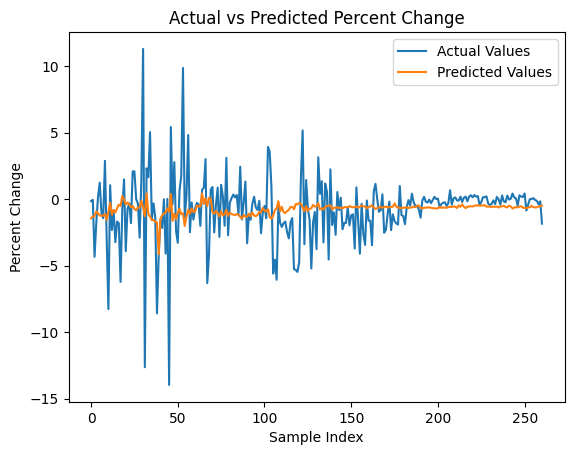

In [12]:
# Predictions on the training set
y_pred = X_quad @ theta_quad

# Plot predictions
plt.plot(range(len(y)), y, label="Actual Values")
plt.plot(range(len(y_pred)), y_pred, label="Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Percent Change")
plt.title("Actual vs Predicted Percent Change")
plt.legend()
plt.show()

In [13]:
# Get Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.952040290110839


In [14]:
# Ridge Regression
lambda_identity = 1e-5 * np.eye(X_quad.shape[1])
theta_quad = np.linalg.inv(X_quad.T @ X_quad + lambda_identity) @ X_quad.T @ y
print(theta_quad)

[-2.88036240e-01 -2.88051043e-01  8.33528601e-03 -8.57492390e-03
 -3.04773481e-08 -2.88043664e-01 -8.61579414e-07  8.67096548e-07
  2.41469071e-13]


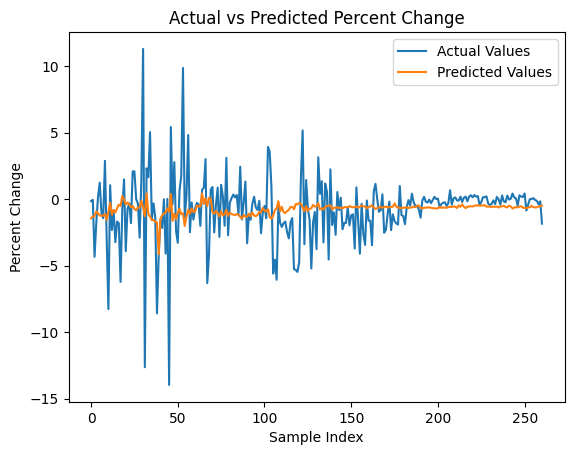

In [15]:
# Predictions on the training set
y_pred = X_quad @ theta_quad

# Plot predictions
plt.plot(range(len(y)), y, label="Actual Values")
plt.plot(range(len(y_pred)), y_pred, label="Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Percent Change")
plt.title("Actual vs Predicted Percent Change")
plt.legend()
plt.show()

In [16]:
# Get Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.952040290110839


Cross-Validation MSE Scores: [ 5.34521168  2.61553172  4.54974048  8.47554852  1.55630347  6.84309627
  6.04800983  2.43605536 10.92865113  3.97900302]
Mean CV MSE: 5.277715146763152
Test Set MSE: 9.867197176485206


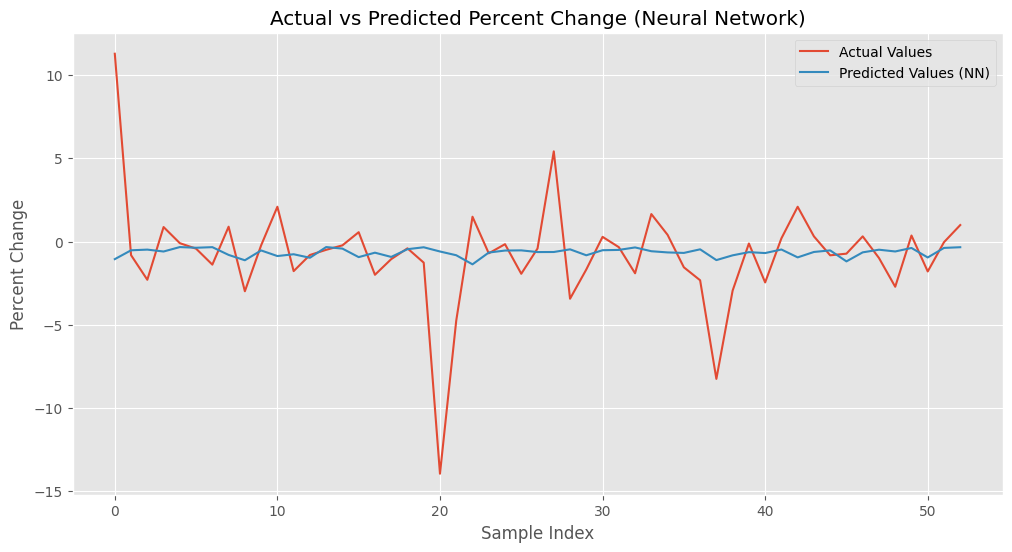

In [17]:
plt.style.use('ggplot')


# Prepare data
X = stock[['Open', 'Close', 'Volume']].values
y = stock['Next Change'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the neural network
model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    early_stopping=True,
    random_state=42
)

# Perform cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
cv_scores = -cv_scores  # Convert negative MSE to positive
mean_cv_score = np.mean(cv_scores)
print(f"Cross-Validation MSE Scores: {cv_scores}")
print(f"Mean CV MSE: {mean_cv_score}")


# Fit the model and evaluate on the test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
print(f"Test Set MSE: {mse_test}")


# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Actual Values")
plt.plot(range(len(y_pred)), y_pred, label="Predicted Values (NN)")
plt.xlabel("Sample Index")
plt.ylabel("Percent Change")
plt.title("Actual vs Predicted Percent Change (Neural Network)")
plt.legend()
plt.show()
